In [1]:
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, auc, confusion_matrix, recall_score, precision_score


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Predicting Gender based on 3rd Party Audience Segments that Users are identified with

3rd Party data providers work with publishers to gather touch points by users online. Based on their online bahaviour, cookie IDs are assigned to audience segments. 

In the new advertising world of people based marketing, it is believed that these online touch points can help advertisers improve their targeting. Eg. Instead of targeting all users online with the same creatives, an advertiser can decide to target only Males Segment users that have shown interest in Sports if they believe that these users highly resonate with their brand.

What segments however should the advertiser use to streamline their target? Are the audience segments able to clearly segment out high potential converters for an ecommerce client?.

For a start, I will be using the audience segments to predict the gender of a cookie ID (instead of predicting if will be converters for an advertiser).

### Read File

In [2]:
ccs_sg = pd.read_csv("C:\\Users\\YCHEN06\\Desktop\\data\\ccs_audiences.csv", )

In [3]:
ccs_gender = pd.read_csv("C:\\Users\\YCHEN06\\Desktop\\data\\ccs_gender.csv", )

### Explore data

In [34]:
ccs_sg.tail(25)

,mm_uuid,provider,segment id,full path,date
17228,ff7756d5-73d8-4e00-a738-ccdfbed7e3be,ey,391,|Eyeota|Interest|Entertainment|Games and Toys,20/5/2017
17229,ff7756d5-73d8-4e00-a738-ccdfbed7e3be,ey,21949,|Eyeota|Interest|Entertainment|Music,20/5/2017
17230,ff7756d5-73d8-4e00-a738-ccdfbed7e3be,ey,459,|Eyeota|Interest|Sports|Football,20/5/2017
17231,ff7756d5-73d8-4e00-a738-ccdfbed7e3be,ey,21738,|Eyeota|Regional Taxonomies|Southeast Asia (SE...,20/5/2017
17232,ff7756d5-73d8-4e00-a738-ccdfbed7e3be,ey,21946,|Eyeota|Interest|Culture and Arts,20/5/2017
17233,ff7756d5-73d8-4e00-a738-ccdfbed7e3be,ey,17202,|Eyeota|Seasonal|Sport Events|Football Matches...,20/5/2017
17234,ff7756d5-73d8-4e00-a738-ccdfbed7e3be,ey,18151,|Eyeota|Branded Data|Global excluding US and E...,17/5/2017
17235,ff7756d5-73d8-4e00-a738-ccdfbed7e3be,ey,21912,|Eyeota|Branded Data|Global excluding US and E...,17/5/2017
17236,ff7756d5-73d8-4e00-a738-ccdfbed7e3be,ey,18456,|Eyeota|Branded Data|Global excluding US and E...,17/5/2017
17237,ff7756d5-73d8-4e00-a738-ccdfbed7e3be,ey,408,|Eyeota|Interest|Fashion and Beauty,17/5/2017


Variable | Description | Type of Variable
---| ---| ---
mm-uuid | distinct online user ID (by cookie ID)  | categorical
provider | source of data | categorical
segment id | unique identifier for full path| categorical
full path | audience segment that user is identified in by provider | descriptive
date | daatestamp of when user was added to the segment | date

In [35]:
ccs_sg.count()

mm_uuid       17253
provider      17253
segment id    17253
full path     17253
date          17253
dtype: int64

In [36]:
ccs_gender.head()

,aac_uuid,ccs_uid,Gender
0,e09d5775-1aa2-4f00-af1b-3b0383b6a6e7,SGP16200003077,Female
1,bfa45769-3bcd-4000-96c8-e32efea73c5c,SGP16200003092,Male
2,ef5b573b-e9b6-4400-a9ab-ec12a0da6d25,SGP16200003071,Male
3,e15c55b4-98f3-4600-866d-496c962744bb,SGP16200003046,Female
4,7a175753-c3b9-4d00-a599-059eb41a860f,SGP16200003065,Female


Variable | Description | Type of Variable
---| ---| ---
aac_uuid | equivalue of mm_uuid  | categorical
ccs_uid | distinct offline user id | categorical
Gender | Female of Male (Declared Data)| categorical

In [37]:
ccs_gender.count()

aac_uuid    1613
ccs_uid     1613
Gender      1613
dtype: int64

### Count of Attributes by Users

#### All

In [38]:
mm_uuid_cnt = ccs_sg.mm_uuid.value_counts()

In [39]:
mm_uuid_cnt.head()

a97d5693-216d-4500-b6de-568a2e87dfd9    649
b55a569f-9000-4d00-a977-98afb2d65b9f    603
9a60557c-f1a2-4b00-b39a-2842a4df66b2    513
033f545c-6429-4000-a828-47695b9e2c52    497
80be54c4-59f9-4900-82de-1f220b31740d    430
Name: mm_uuid, dtype: int64

In [40]:
mm_uuid_cnt.count()

148

## 148 ccs users were found with at least 1 audience segment attribute.

#### Dedup Repeated Segments

Segments for each mm_uuid is associated with a datestamp. Some users may get assigned to the same segment again across time. To count each segment once only for each user, the data set needs to be deduplicated.

In [41]:
unique_segments_mmuuid = ccs_sg.drop_duplicates(['mm_uuid','segment id','full path'])

In [42]:
unique_segments_mmuuid_summarize = unique_segments_mmuuid['mm_uuid'].value_counts()

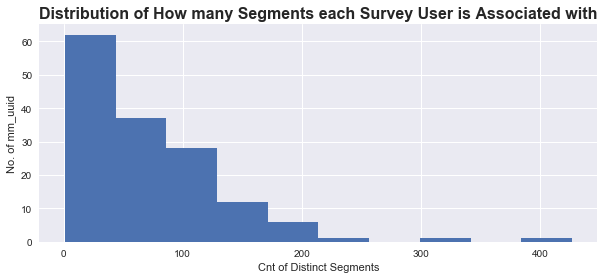

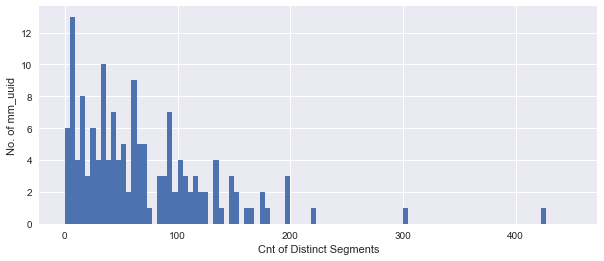

In [43]:
binBoundaries = np.linspace(0,450,100)

fig = plt.figure()
plt.title('Distribution of How many Segments each Survey User is Associated with', fontsize=16, fontweight='bold')
unique_segments_mmuuid_summarize.hist(figsize=(10,4))
plt.xlabel('Cnt of Distinct Segments')
plt.ylabel('No. of mm_uuid')

fig = plt.figure()
unique_segments_mmuuid_summarize.hist(figsize=(10,4),bins=binBoundaries)
plt.xlabel('Cnt of Distinct Segments')
plt.ylabel('No. of mm_uuid')

### Most Popular Segments

#### All 

In [44]:
segment_cnt = ccs_sg['full path'].value_counts()

In [45]:
segment_cnt.count()

899

#### Dedup Repeated Segments

We deduplicated repeated segments mm_uuids have a date stamp association. This means that day after day, the users is getting placed back in the same segment again

In [46]:
unique_segments_mmuuid_summarizesegment = unique_segments_mmuuid['full path'].value_counts()

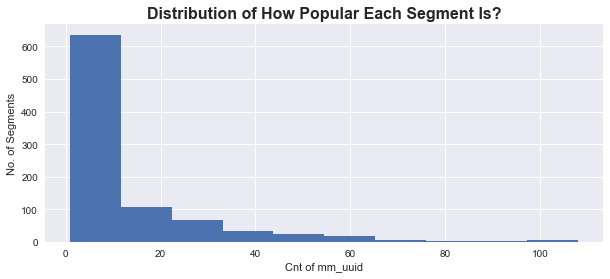

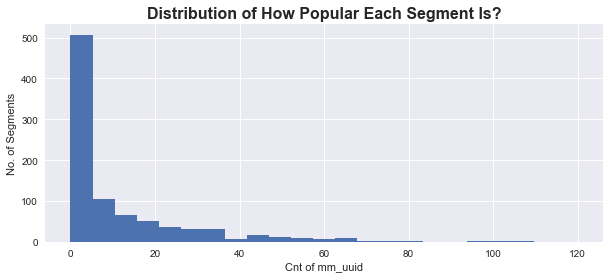

In [48]:
binBoundaries = np.linspace(0,120,24)

fig = plt.figure()
unique_segments_mmuuid_summarizesegment.hist(figsize=(10,4))
plt.title('Distribution of How Popular Each Segment Is?', fontsize=16, fontweight='bold')
plt.xlabel('Cnt of mm_uuid')
plt.ylabel('No. of Segments')

fig = plt.figure()
plt.title('Distribution of How Popular Each Segment Is?', fontsize=16, fontweight='bold')
unique_segments_mmuuid_summarizesegment.hist(figsize=(10,4),bins=binBoundaries)
plt.xlabel('Cnt of mm_uuid')
plt.ylabel('No. of Segments')

In [49]:
unique_segments_mmuuid_summarizesegment.head()

|Eyeota|Business or B2B                                                              108
|Eyeota|Branded Data|Global Bombora|B2B|Professional Groups|Business Professional    102
|Eyeota|Interest|Tech Enthusiasts                                                    101
|Eyeota|Business or B2B|Professions|Business Professionals                           100
|Eyeota|Regional Taxonomies|Southeast Asia (SEA)|Interest|Tech Enthusiasts            97
Name: full path, dtype: int64

#### Finding Commonly repeated Segments

In [50]:
segment_mm_uuid_cnt = ccs_sg[['mm_uuid','full path']].groupby(['full path']).nunique()

In [51]:
ccs_sg['combined'] = ccs_sg.mm_uuid + ccs_sg.date

In [52]:
segment_combined_cnt = ccs_sg[['combined','full path']].groupby(['full path']).nunique()

In [53]:
segment = pd.concat([segment_mm_uuid_cnt,segment_combined_cnt],axis=1,join='inner')

In [54]:
segment['freq']=segment['combined']/segment['mm_uuid']

In [55]:
segment[segment['mm_uuid']>10].sort_values(['freq'],ascending=False).head(10)

,mm_uuid,full path,combined,full path,freq
full path,,,,,
|Eyeota|Regional Taxonomies|Southeast Asia (SEA)|Interest|Pets,15,1,37,1,2.466667
|Eyeota|Intent|Financial Intent|Personal Finance,17,1,40,1,2.352941
|Eyeota|Demographic|Inferred Age|21-24,17,1,38,1,2.235294
|Eyeota|Demographic|Lifestyle|Household Decision Makers,21,1,44,1,2.095238
|Eyeota|Regional Taxonomies|Southeast Asia (SEA)|Interest|Fashion and Beauty,11,1,23,1,2.090909
|Eyeota|Interest|Parenting,11,1,23,1,2.090909
|Eyeota|Branded Data|Global Bombora|B2C|Lifestyle|Hobbies and Interests|Gardening,11,1,23,1,2.090909
|Eyeota|Branded Data|Global Bombora|B2B|B2B Predictive Signals|Human Resources|Performance,12,1,25,1,2.083333
|Eyeota|Demographic|Inferred Age|25-34,30,1,62,1,2.066667


### Creating Dummy Variables for Audence Segment

In [56]:
create_dummies_data = ccs_sg[['mm_uuid','full path']].drop_duplicates(['mm_uuid','full path'])

In [57]:
create_dummies_data.count()

mm_uuid      10273
full path    10273
dtype: int64

In [58]:
create_dummies_data.head()

,mm_uuid,full path
0,033f545c-6429-4000-a828-47695b9e2c52,|Eyeota|Branded Data|Global excluding US and E...
1,033f545c-6429-4000-a828-47695b9e2c52,|Eyeota|Branded Data|Global excluding US and E...
2,033f545c-6429-4000-a828-47695b9e2c52,|Eyeota|Branded Data|Global excluding US and E...
3,033f545c-6429-4000-a828-47695b9e2c52,|Eyeota|Interest|Entertainment|News
4,033f545c-6429-4000-a828-47695b9e2c52,|Eyeota|Branded Data|Global excluding US and E...


In [59]:
dummies = pd.get_dummies(create_dummies_data['full path']).join(create_dummies_data['mm_uuid'])

In [60]:
cols = dummies.columns[1:]

In [61]:
dummies = dummies.groupby(['mm_uuid'])[cols].sum()

In [62]:
dummies['segment_cnt']=dummies.sum(axis=1)

In [63]:
dummies.head()

,|Eyeota|Branded Data|EMEA|EMEA ShareThis|Arts and Entertainment|Humor,|Eyeota|Branded Data|EMEA|EMEA ShareThis|Computers and Electronics,|Eyeota|Branded Data|EMEA|EMEA ShareThis|Computers and Electronics|Software,|Eyeota|Branded Data|EMEA|EMEA ShareThis|Computers and Electronics|Software|Open Source,|Eyeota|Branded Data|EMEA|EMEA ShareThis|Food and Drink|Food|Meat and Seafood,|Eyeota|Branded Data|EMEA|EMEA ShareThis|Home and Garden,|Eyeota|Branded Data|EMEA|EMEA ShareThis|Home and Garden|Bed and Bath,|Eyeota|Branded Data|EMEA|EMEA ShareThis|Home and Garden|Bed and Bath|Bathroom,|Eyeota|Branded Data|EMEA|EMEA ShareThis|Internet and Telecom,|Eyeota|Branded Data|EMEA|EMEA ShareThis|Internet and Telecom|Service Providers,...,|Eyeota|Seasonal|Sport Events|Football Matches|Champions League Fans,|Eyeota|Seasonal|Sport Events|Football Matches|EURO 2016 France,|Eyeota|Seasonal|Sport Events|Football Matches|EURO 2016 France|Qualifiers,|Eyeota|Seasonal|Sport Events|Football Matches|FIFA World Cup 2018,|Eyeota|Seasonal|Sport Events|NBA,|Eyeota|Seasonal|Sport Events|Premier League Fans,|Eyeota|Seasonal|Sport Events|Rugby World Cup Fans,|Eyeota|Seasonal|Sport Events|Summer Olympics - Rio 2016,|Eyeota|Seasonal|Sport Events|Winter Olympics - Pyeongchang 2018,segment_cnt
mm_uuid,,,,,,,,,,,,,,,,,,,,,
033f545c-6429-4000-a828-47695b9e2c52,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,198
035c551c-097e-4900-80c9-f9df6a50452c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,63
04f155da-cfb4-4000-9cb9-f22a71107b06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,70
07d955de-7752-4d00-8d65-a4f5d07ee390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,58
08ed55cd-4a26-4a00-9750-8f3d8413d258,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,65


In [69]:
dummies.sort_values(['segment_cnt'],ascending=False).head()

,|Eyeota|Branded Data|EMEA|EMEA ShareThis|Arts and Entertainment|Humor,|Eyeota|Branded Data|EMEA|EMEA ShareThis|Computers and Electronics,|Eyeota|Branded Data|EMEA|EMEA ShareThis|Computers and Electronics|Software,|Eyeota|Branded Data|EMEA|EMEA ShareThis|Computers and Electronics|Software|Open Source,|Eyeota|Branded Data|EMEA|EMEA ShareThis|Food and Drink|Food|Meat and Seafood,|Eyeota|Branded Data|EMEA|EMEA ShareThis|Home and Garden,|Eyeota|Branded Data|EMEA|EMEA ShareThis|Home and Garden|Bed and Bath,|Eyeota|Branded Data|EMEA|EMEA ShareThis|Home and Garden|Bed and Bath|Bathroom,|Eyeota|Branded Data|EMEA|EMEA ShareThis|Internet and Telecom,|Eyeota|Branded Data|EMEA|EMEA ShareThis|Internet and Telecom|Service Providers,...,|Eyeota|Seasonal|Sport Events|Football Matches|Champions League Fans,|Eyeota|Seasonal|Sport Events|Football Matches|EURO 2016 France,|Eyeota|Seasonal|Sport Events|Football Matches|EURO 2016 France|Qualifiers,|Eyeota|Seasonal|Sport Events|Football Matches|FIFA World Cup 2018,|Eyeota|Seasonal|Sport Events|NBA,|Eyeota|Seasonal|Sport Events|Premier League Fans,|Eyeota|Seasonal|Sport Events|Rugby World Cup Fans,|Eyeota|Seasonal|Sport Events|Summer Olympics - Rio 2016,|Eyeota|Seasonal|Sport Events|Winter Olympics - Pyeongchang 2018,segment_cnt
mm_uuid,,,,,,,,,,,,,,,,,,,,,
9a60557c-f1a2-4b00-b39a-2842a4df66b2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,426
a97d5693-216d-4500-b6de-568a2e87dfd9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,304
b55a569f-9000-4d00-a977-98afb2d65b9f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,220
58795583-dd06-4d00-a85c-f7f625e14751,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,200
033f545c-6429-4000-a828-47695b9e2c52,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,198


In [70]:
segment_popularity =pd.DataFrame.from_dict(dummies[dummies.columns[1:]].sum())

In [71]:
segment_popularity.describe()

,0
count,898.000000
mean,22.876392
std,342.802301
min,1.000000
25%,1.000000
50%,4.000000
75%,15.000000
max,10272.000000


In [72]:
segment_popularity.sort_values(0, ascending=False).head(20)

,0
segment_cnt,10272
|Eyeota|Business or B2B,108
|Eyeota|Branded Data|Global Bombora|B2B|Professional Groups|Business Professional,102
|Eyeota|Interest|Tech Enthusiasts,101
|Eyeota|Business or B2B|Professions|Business Professionals,100
|Eyeota|Regional Taxonomies|Southeast Asia (SEA)|Interest|Tech Enthusiasts,97
|Eyeota|Business or B2B|Interest|Marketing and Advertising,81
|Eyeota|Interest|Entertainment,79
|Eyeota|Regional Taxonomies|Southeast Asia (SEA)|Interest|Arts and Entertainment,77
|Eyeota|Business or B2B|Interest|IT and Technology,74


### Merging the Audience Data with Declared Gender

In [73]:
ccs_gender.columns=['mm_uuid', 'ccs_uid', 'Gender']

In [74]:
dummies=dummies.reset_index()

In [75]:
data = ccs_gender.join(dummies.set_index('mm_uuid'),how='right',on='mm_uuid')

In [76]:
data.head()

,mm_uuid,ccs_uid,Gender,|Eyeota|Branded Data|EMEA|EMEA ShareThis|Arts and Entertainment|Humor,|Eyeota|Branded Data|EMEA|EMEA ShareThis|Computers and Electronics,|Eyeota|Branded Data|EMEA|EMEA ShareThis|Computers and Electronics|Software,|Eyeota|Branded Data|EMEA|EMEA ShareThis|Computers and Electronics|Software|Open Source,|Eyeota|Branded Data|EMEA|EMEA ShareThis|Food and Drink|Food|Meat and Seafood,|Eyeota|Branded Data|EMEA|EMEA ShareThis|Home and Garden,|Eyeota|Branded Data|EMEA|EMEA ShareThis|Home and Garden|Bed and Bath,...,|Eyeota|Seasonal|Sport Events|Football Matches|Champions League Fans,|Eyeota|Seasonal|Sport Events|Football Matches|EURO 2016 France,|Eyeota|Seasonal|Sport Events|Football Matches|EURO 2016 France|Qualifiers,|Eyeota|Seasonal|Sport Events|Football Matches|FIFA World Cup 2018,|Eyeota|Seasonal|Sport Events|NBA,|Eyeota|Seasonal|Sport Events|Premier League Fans,|Eyeota|Seasonal|Sport Events|Rugby World Cup Fans,|Eyeota|Seasonal|Sport Events|Summer Olympics - Rio 2016,|Eyeota|Seasonal|Sport Events|Winter Olympics - Pyeongchang 2018,segment_cnt
35,152a56c3-d253-4b00-b7fa-8114c399815b,SGP16200000312,Male,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,146
37,1cf455cf-1993-4000-8175-b128aec36937,SGP16200004196,Female,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,32
53,9c9553b3-b1e2-4400-9d9f-bebfb2b0702a,SGP16200004293,Male,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,66
54,ff7756d5-73d8-4e00-a738-ccdfbed7e3be,SGP16200004356,Male,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,120
76,92c354f6-a838-4f00-9d57-8f9bf22c7990,SGP16200004395,Female,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,32


### Explore Data with Declared Data

In [77]:
pop_segments = segment_popularity.sort_values(0, ascending=False)[1:].head(10).reset_index()
pop_segments.columns = ['segment','cnt']
select = list(pop_segments['segment'])

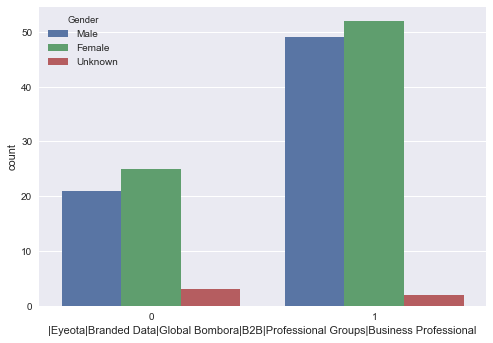

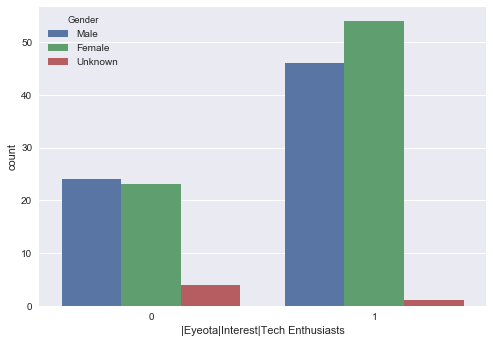

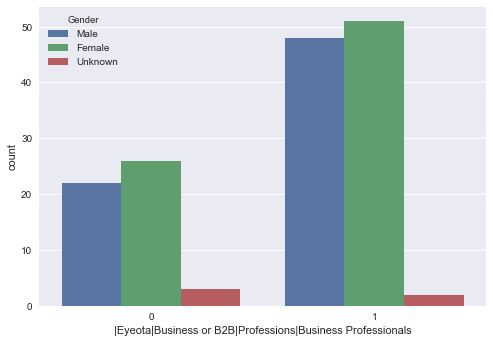

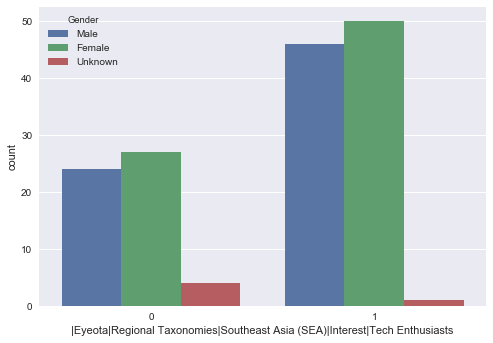

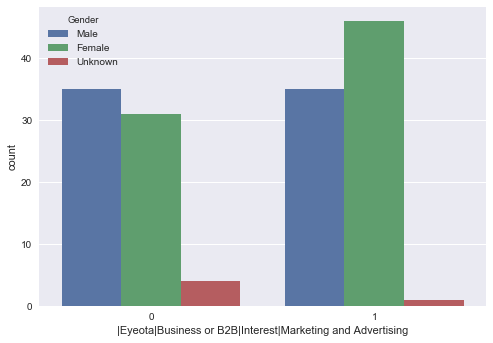

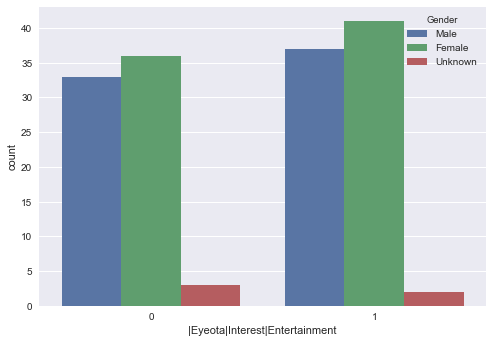

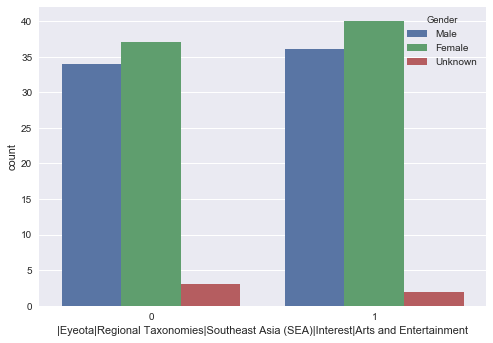

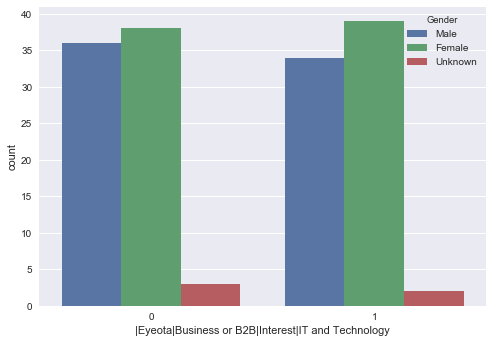

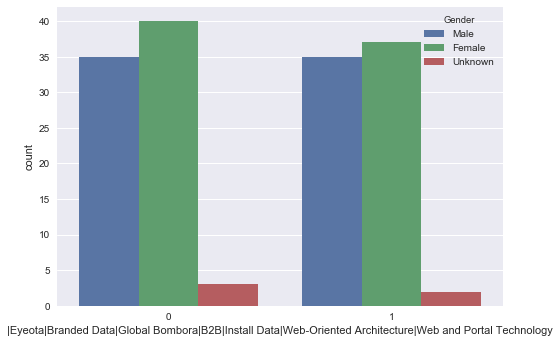

In [78]:
figs = {}
axs={}

for i in range(1,10):    
    figs[i]=plt.figure()
    axs[i] = sns.countplot(x=select[i], hue="Gender", data=data)

In [79]:
def random():
    random_segments = segment_popularity.sample(n=1).reset_index()
    random_segments.columns = ['segment','cnt']
    random = list(random_segments['segment'])
    fig = plt.figure()
    plt.title(random[0], fontsize=16, fontweight='bold')
    sns.countplot(x=random[0], hue="Gender", data=data)

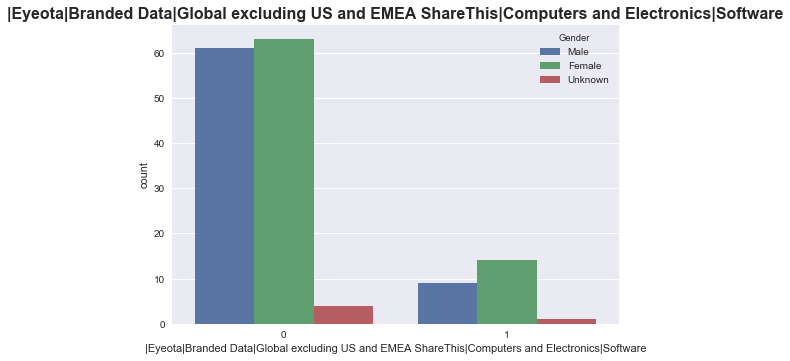

In [80]:
random()

In [81]:
gender_cols = [col for col in data.columns if 'male' in col]+[col for col in data.columns if 'Male' in col]
gender_cols

['|Eyeota|Branded Data|Global Bombora|B2C|Gender|Female',
 '|Eyeota|Branded Data|USA|US StatSocial|Legendary Entertainment|Demographics|Gender|Female',
 '|Eyeota|Demographic|Declared Gender|Female',
 '|Eyeota|Demographic|Inferred Gender|Female',
 '|Eyeota|Regional Taxonomies|Southeast Asia (SEA)|Demographic|Inferred Gender|Female',
 '|Eyeota|Branded Data|Global Bombora|B2C|Gender|Male',
 '|Eyeota|Demographic|Declared Gender|Male',
 '|Eyeota|Demographic|Inferred Gender|Male',
 '|Eyeota|Regional Taxonomies|Southeast Asia (SEA)|Demographic|Inferred Gender|Male']

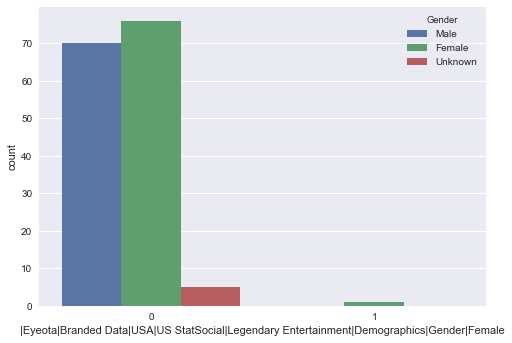

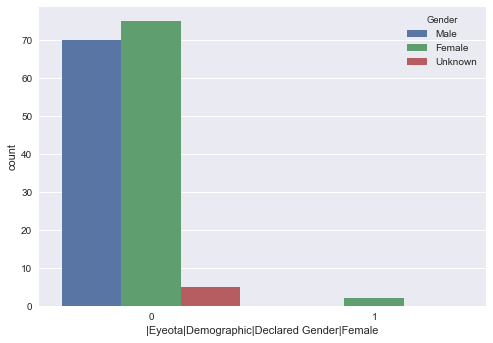

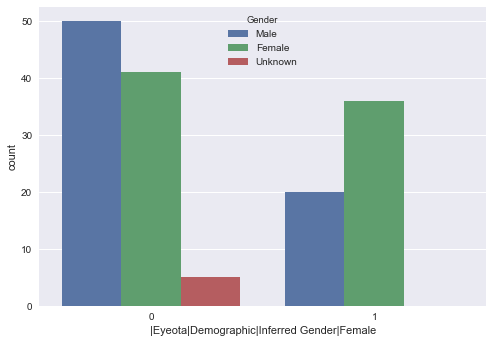

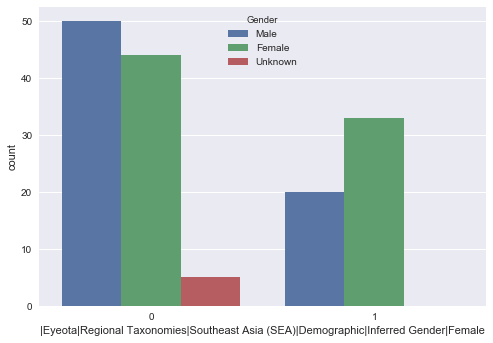

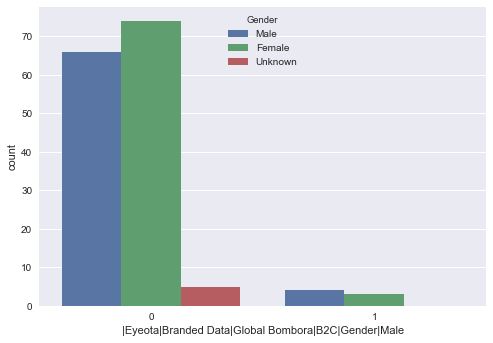

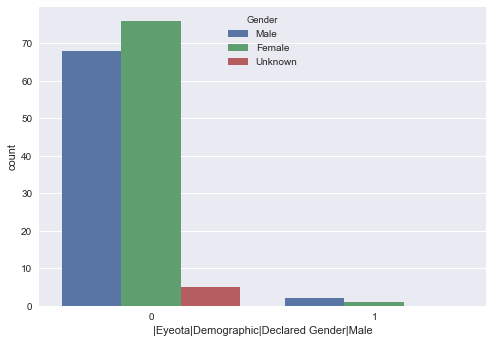

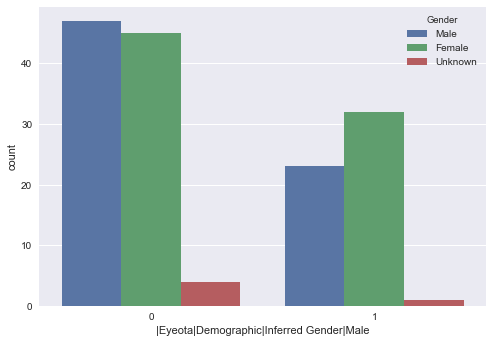

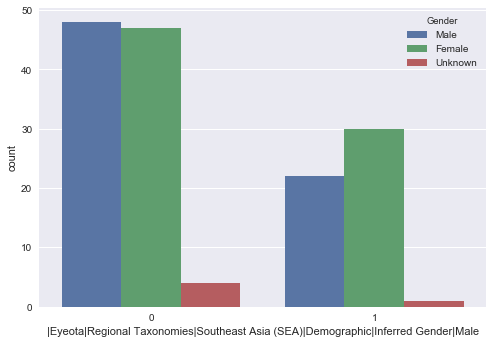

In [82]:
figs = {}
axs={}

for i in range(1,9):    
    figs[i]=plt.figure()
    axs[i] = sns.countplot(x=gender_cols[i], hue="Gender", data=data)

### Creating Models

In [83]:
data=data[data['Gender']!='Unknown']

In [84]:
data['Gender_1_0']=data['Gender']

In [85]:
 d = {'Female': 1, 'Male': 0}

In [86]:
data['Gender_1_0']=data['Gender_1_0'].replace(d)

### Correlation Analysis for Features

In [213]:
corr = pd.DataFrame(data.corr()['Gender_1_0'])
corr['abs'] = abs(pd.DataFrame(data.corr()['Gender_1_0']))

In [214]:
corr = corr.reset_index()

In [247]:
pd.set_option('display.max_colwidth', 1000)
corr.head(10)

,Segment,Corr,Corr_Abs
899,Gender_1_0,1.000000,1.000000
777,|Eyeota|Interest|Food Enthusiasts|Cocktails and Drinks,0.286143,0.286143
892,|Eyeota|Seasonal|Sport Events|Football Matches|FIFA World Cup 2018,-0.262948,0.262948
805,|Eyeota|Interest|Sports|Football,-0.262948,0.262948
531,|Eyeota|Branded Data|Global excluding US and EMEA ShareThis|Food and Drink|Beverages|Coffee and Tea,0.259608,0.259608
781,|Eyeota|Interest|Food Enthusiasts|Vegetarians and Vegans,0.249004,0.249004
711,|Eyeota|Intent|Shopping|CPG / FMCG|Grocery,0.247273,0.247273
857,|Eyeota|Regional Taxonomies|Southeast Asia (SEA)|Interest|Sports|Football,-0.246512,0.246512
778,|Eyeota|Interest|Food Enthusiasts|Cooking,0.240786,0.240786
710,|Eyeota|Intent|Shopping|CPG / FMCG,0.223172,0.223172


In [215]:
corr.columns = ['Segment','Corr','Corr_Abs']

In [216]:
corr = corr.sort_values('Corr_Abs',ascending=False)

In [217]:
features = pd.DataFrame(corr.sort_values('Corr_Abs',ascending=False)['Segment'])

### MODEL 1: Logistic Regression - Ranked Features by Correlation

In [233]:
data['Gender_1_0']=data['Gender']

In [234]:
 d = {'Female': 1, 'Male': 0}

In [235]:
data['Gender_1_0']=data['Gender_1_0'].replace(d)

In [236]:
type(data['Gender_1_0'])

pandas.core.series.Series

In [237]:
data['Gender_1_0'].value_counts()

1    77
0    70
Name: Gender_1_0, dtype: int64

In [238]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model_logistic = LogisticRegression(C=1e9)
factors = features['Segment'][1:10]
model_logistic.fit(data[factors], data['Gender_1_0'])
scores = cross_val_score(model_logistic, data[factors], data['Gender_1_0'], scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [ 0.67067308  0.65050167  0.64347826], Average AUC 0.654884336677815


In [239]:
l_n =[]
l_auc =[]

for n in range(2,900,5):
    model_logistic = LogisticRegression(C=1e9)
    factors = features['Segment'][1:n]
    model_logistic.fit(data[factors], data['Gender_1_0'])
    scores = cross_val_score(model_logistic, data[factors], data['Gender_1_0'], scoring='roc_auc')
    l_n.append(n)
    l_auc.append(scores.mean())


In [240]:
output1_logistic = pd.DataFrame.from_dict(l_n)
output2_logistic = pd.DataFrame.from_dict(l_auc)

output1_logistic.columns=['l_n']
output2_logistic.columns=['l_auc']
output_logistic = output1_logistic.join(output2_logistic)
output_logistic.sort_values(['l_auc'],ascending=False).head()

,l_n,l_auc
9,47,0.709437
3,17,0.705065
5,27,0.698467
6,32,0.698467
27,137,0.695588


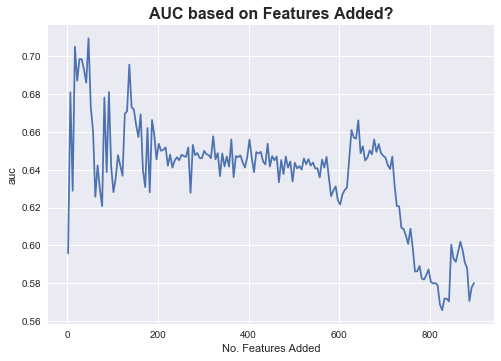

In [241]:
fig = plt.figure()
plt.title('AUC based on Features Added?', fontsize=16, fontweight='bold')
plt.plot(l_n,l_auc)
plt.xlabel('No. Features Added')
plt.ylabel('auc')

### MODEL 2: Random Forest

In [207]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

t_ntrees = []
t_depth =[]
t_auc=[]
X = data[data.columns[3:902]]
y = data['Gender_1_0']

for n_trees in range(1, 200, 20):
    for depth in range(1, 10, 1):
        model = RandomForestClassifier(n_estimators = n_trees, max_depth = depth, random_state=50)
        scores = cross_val_score(model, X, y, scoring='roc_auc')
        t_ntrees.append(n_trees)
        t_depth.append(depth)
        t_auc.append(scores.mean())

output1 = pd.DataFrame.from_dict(t_ntrees)
output2 = pd.DataFrame.from_dict(t_depth)
output3 = pd.DataFrame.from_dict(t_auc)
output1.columns=['ntrees']
output2.columns=['depth']
output3.columns=['auc']
output = output1.join(output2).join(output3)
output.sort_values(['auc'],ascending=False).head()

,ntrees,depth,auc
56,121,3,0.639556
55,121,2,0.638543
37,81,2,0.635630
64,141,2,0.634293
65,141,3,0.631404


#### Feature Importance

In [209]:
model = RandomForestClassifier(n_estimators = 121, max_depth=3, random_state=50)
X = data[data.columns[3:902]]
y = data['Gender_1_0']
model.fit(X, y)
scores = cross_val_score(model, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [ 0.53525641  0.67558528  0.70782609], Average AUC 0.6395559271646228


In [210]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Features,Importance Score
805,|Eyeota|Interest|Sports|Football,0.029144
898,segment_cnt,0.020877
777,|Eyeota|Interest|Food Enthusiasts|Cocktails an...,0.019256
781,|Eyeota|Interest|Food Enthusiasts|Vegetarians ...,0.015991
857,|Eyeota|Regional Taxonomies|Southeast Asia (SE...,0.015597


### MODEL 3: Logistic Regression - Ranked Features from Random Forest

In [227]:
data['Gender_1_0']=data['Gender']
d = {'Female': 1, 'Male': 0}
data['Gender_1_0']=data['Gender_1_0'].replace(d)    

In [228]:
l_n =[]
l_auc =[]

for n in range(1,899,5):
    model_logistic = LogisticRegression(C=1e9, random_state=50)
    factors = features_df['Features'][0:n]
    model_logistic.fit(data[factors], data['Gender_1_0'])
    scores = cross_val_score(model_logistic, data[factors], data['Gender_1_0'], scoring='roc_auc')
    l_n.append(n)
    l_auc.append(scores.mean())
    
output1_logistic = pd.DataFrame.from_dict(l_n)
output2_logistic = pd.DataFrame.from_dict(l_auc)

output1_logistic.columns=['l_n']
output2_logistic.columns=['l_auc']
output_logistic = output1_logistic.join(output2_logistic)
output_logistic.sort_values(['l_auc'],ascending=False).head()

,l_n,l_auc
9,46,0.763189
10,51,0.747230
8,41,0.743830
18,91,0.742703
7,36,0.738993


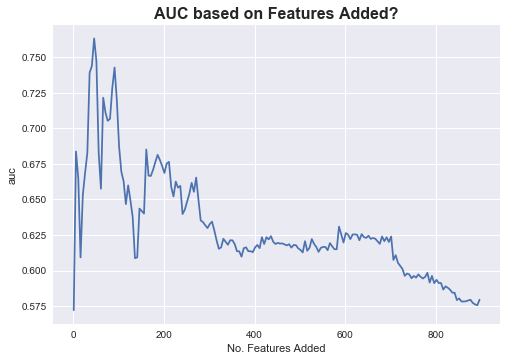

In [230]:
fig = plt.figure()
plt.title('AUC based on Features Added?', fontsize=16, fontweight='bold')
plt.plot(l_n,l_auc)
plt.xlabel('No. Features Added')
plt.ylabel('auc')